In [1]:
import json
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
with open(f'trivy_5k.json', 'r') as file:
    trivy = json.load(file)
with open(f'anchore_5k.json', 'r') as file:
    anchore = json.load(file)
with open(f'snyk_5k.json', 'r') as file:
    snyk = json.load(file)
with open(f'clair_5k.json', 'r') as file:
    clair = json.load(file)

In [4]:
trivy_count = {"Image_num": 0, "Vuln": 0, "Low": 0, "Medium": 0, "High": 0, "Critical": 0, "Unknown": 0, "Fixed_low": 0, "Fixed_medium": 0, "Fixed_high": 0, "Fixed_critical": 0, "Fixed_unknown": 0}
anchore_count = {"Image_num": 0, "Vuln": 0, "Low": 0, "Medium": 0, "High": 0, "Critical": 0, "Unknown": 0, "Fixed_low": 0, "Fixed_medium": 0, "Fixed_high": 0, "Fixed_critical": 0, "Fixed_unknown": 0}
snyk_count = {"Image_num": 0, "Vuln": 0, "Low": 0, "Medium": 0, "High": 0, "Critical": 0, "Unknown": 0, "Fixed_low": 0, "Fixed_medium": 0, "Fixed_high": 0, "Fixed_critical": 0, "Fixed_unknown": 0}
clair_count = {"Image_num": 0, "Vuln": 0, "Low": 0, "Medium": 0, "High": 0, "Critical": 0, "Unknown": 0, "Fixed_low": 0, "Fixed_medium": 0, "Fixed_high": 0, "Fixed_critical": 0, "Fixed_unknown": 0}
clair_other = []
trivy_other = []
snyk_other = []
anchore_other = []
clair_set = set([])
trivy_set = set([])
snyk_set = set([])
anchore_set = set([])

In [5]:
for image in clair:
    try:
        if len(image['Metadata']) != 0:
            clair_count['Image_num'] += 1
        for vuln in image["Metadata"]:
            index_of_first_dash = vuln['Vulnerability'].index('-')
            try:
                index_of_third_dash = vuln['Vulnerability'].index(' ')
            except:
                index_of_third_dash = len(vuln['Vulnerability'])
            clair_count['Vuln'] += 1
            if vuln['Vulnerability'][:index_of_first_dash] != 'CVE':
                clair_other.append(vuln['Vulnerability'][:index_of_first_dash])
            else:
                clair_set.add(vuln['Vulnerability'][:index_of_third_dash])
            if vuln["Fixed"] != '':
                if vuln["Severity"].lower() == 'low':
                    clair_count['Low'] += 1
                    clair_count['Fixed_low'] += 1
                elif vuln["Severity"].lower() == 'medium':
                    clair_count['Medium'] += 1
                    clair_count['Fixed_medium'] += 1
                elif vuln["Severity"].lower() == 'high':
                    clair_count['High'] += 1
                    clair_count['Fixed_high'] += 1
                elif vuln["Severity"].lower() == 'critical':
                    clair_count['Critical'] += 1
                    clair_count['Fixed_critical'] += 1
                elif vuln["Severity"].lower() == 'unknown':
                    clair_count['Unknown'] += 1
                    clair_count['Fixed_unknown'] += 1
            else:
                if vuln["Severity"].lower() == 'low':
                    clair_count['Low'] += 1
                elif vuln["Severity"].lower() == 'medium':
                    clair_count['Medium'] += 1
                elif vuln["Severity"].lower() == 'high':
                    clair_count['High'] += 1
                elif vuln["Severity"].lower() == 'critical':
                    clair_count['Critical'] += 1
                elif vuln["Severity"].lower() == 'unknown':
                    clair_count['Unknown'] += 1
    except:
        print(clair_count['Image_num'], image)

11 None
18 None
32 {'Image': 'summersillk/acesdevtest:nodejsv1', 'Metadata': [{'Vulnerability': 'CVE-2022-20368 kernel: net/packet: slab-out-of-bounds access in packet_recvmsg() (moderate)', 'Severity': 'Medium', 'Fixed': ''}, {'Vulnerability': 'firefox: Possible integer overflow to fix inside XML_Parse in Expat (low)', 'Severity': 'Low', 'Fixed': ''}, {'Vulnerability': 'On multi-user machines Git users might find themselves unexpectedly in a Git worktree (moderate)', 'Severity': 'Medium', 'Fixed': ''}, {'Vulnerability': 'CVE-2016-4490 gcc: Write access violation (low)', 'Severity': 'Low', 'Fixed': ''}, {'Vulnerability': 'CVE-2018-7273 kernel: Kernel address information leak in drivers/block/floppy.c:show_floppy function potentially allowing KASLR bypass (low)', 'Severity': 'Low', 'Fixed': ''}, {'Vulnerability': 'RHSA-2023:3555: python security update (Important)', 'Severity': 'High', 'Fixed': '0:2.7.5-93.el7_9'}, {'Vulnerability': 'CVE-2021-3984 vim: illegal memory access in find_star

In [6]:
for image in trivy:
    try:
        if len(image['Metadata']) != 0:
            trivy_count['Image_num'] += 1
        for vuln in image["Metadata"]:
            index_of_first_dash = vuln['Vulnerability'].index('-')
            try:
                index_of_third_dash = vuln['Vulnerability'].index(' ')
            except:
                index_of_third_dash = len(vuln['Vulnerability'])
            clair_count['Vuln'] += 1
            if vuln['Vulnerability'][:index_of_first_dash] != 'CVE':
                trivy_other.append(vuln['Vulnerability'][:index_of_first_dash])
            else:
                trivy_set.add(vuln['Vulnerability'][:index_of_third_dash])
            trivy_count['Vuln'] += 1
            if vuln["Fixed"] != 0:
                if vuln["Severity"].lower() == 'low':
                    trivy_count['Low'] += 1
                    trivy_count['Fixed_low'] += 1
                elif vuln["Severity"].lower() == 'medium':
                    trivy_count['Medium'] += 1
                    trivy_count['Fixed_medium'] += 1
                elif vuln["Severity"].lower() == 'high':
                    trivy_count['High'] += 1
                    trivy_count['Fixed_high'] += 1
                elif vuln["Severity"].lower() == 'critical':
                    trivy_count['Critical'] += 1
                    trivy_count['Fixed_critical'] += 1
                elif vuln["Severity"].lower() == 'unknown':
                    trivy_count['Unknown'] += 1
                    trivy_count['Fixed_unknown'] += 1
            else:
                if vuln["Severity"].lower() == 'low':
                    trivy_count['Low'] += 1
                elif vuln["Severity"].lower() == 'medium':
                    trivy_count['Medium'] += 1
                elif vuln["Severity"].lower() == 'high':
                    trivy_count['High'] += 1
                elif vuln["Severity"].lower() == 'critical':
                    trivy_count['Critical'] += 1
                elif vuln["Severity"].lower() == 'unknown':
                    trivy_count['Unknown'] += 1
    except:
        print(trivy_count['Image_num'], image)

In [7]:
for image in anchore:
    if len(image['Metadata']) != 0:
        anchore_count['Image_num'] += 1
    for vuln in image["Metadata"]:
        index_of_first_dash = vuln['Vulnerability'].index('-')
        try:
            index_of_third_dash = vuln['Vulnerability'].index(' ')
        except:
            index_of_third_dash = len(vuln['Vulnerability'])
        clair_count['Vuln'] += 1
        if vuln['Vulnerability'][:index_of_first_dash] != 'CVE':
            anchore_other.append(vuln['Vulnerability'][:index_of_first_dash])
        else:
            anchore_set.add(vuln['Vulnerability'][:index_of_third_dash])
        anchore_count['Vuln'] += 1
        if vuln["Fixed"] == 1:
            if vuln["Severity"].lower() == 'low':
                anchore_count['Low'] += 1
                anchore_count['Fixed_low'] += 1
            elif vuln["Severity"].lower() == 'medium':
                anchore_count['Medium'] += 1
                anchore_count['Fixed_medium'] += 1
            elif vuln["Severity"].lower() == 'high':
                anchore_count['High'] += 1
                anchore_count['Fixed_high'] += 1
            elif vuln["Severity"].lower() == 'critical':
                anchore_count['Critical'] += 1
                anchore_count['Fixed_critical'] += 1
            elif vuln["Severity"].lower() == 'unknown':
                anchore_count['Unknown'] += 1
                anchore_count['Fixed_unknown'] += 1
        else:
            if vuln["Severity"].lower() == 'low':
                anchore_count['Low'] += 1
            elif vuln["Severity"].lower() == 'medium':
                anchore_count['Medium'] += 1
            elif vuln["Severity"].lower() == 'high':
                anchore_count['High'] += 1
            elif vuln["Severity"].lower() == 'critical':
                anchore_count['Critical'] += 1
            elif vuln["Severity"].lower() == 'unknown':
                anchore_count['Unknown'] += 1

In [8]:
for image in snyk:
    if len(image['Metadata']) != 0:
        snyk_count['Image_num'] += 1
    for vuln in image["Metadata"]:
        index_of_first_dash = vuln['vulnerability'].index('-')
        try:
            index_of_third_dash = vuln['vulnerability'].index(' ')
        except:
            index_of_third_dash = len(vuln['vulnerability'])
        clair_count['Vuln'] += 1
        if vuln['vulnerability'][:index_of_first_dash] != 'CVE':
            snyk_other.append(vuln['vulnerability'][:index_of_first_dash])
        else:
            snyk_set.add(vuln['vulnerability'][:index_of_third_dash])
        snyk_count['Vuln'] += 1
        if vuln["Fixed"] == 1:
            if vuln["severity"].lower() == 'low':
                snyk_count['Low'] += 1
                snyk_count['Fixed_low'] += 1
            elif vuln["severity"].lower() == 'medium':
                snyk_count['Medium'] += 1
                snyk_count['Fixed_medium'] += 1
            elif vuln["severity"].lower() == 'high':
                snyk_count['High'] += 1
                snyk_count['Fixed_high'] += 1
            elif vuln["severity"].lower() == 'critical':
                snyk_count['Critical'] += 1
                snyk_count['Fixed_critical'] += 1
            elif vuln["severity"].lower() == 'unknown':
                snyk_count['Unknown'] += 1
                snyk_count['Fixed_unknown'] += 1
        else:
            if vuln["severity"].lower() == 'low':
                snyk_count['Low'] += 1
            elif vuln["severity"].lower() == 'medium':
                snyk_count['Medium'] += 1
            elif vuln["severity"].lower() == 'high':
                snyk_count['High'] += 1
            elif vuln["severity"].lower() == 'critical':
                snyk_count['Critical'] += 1
            elif vuln["severity"].lower() == 'unknown':
                snyk_count['Unknown'] += 1

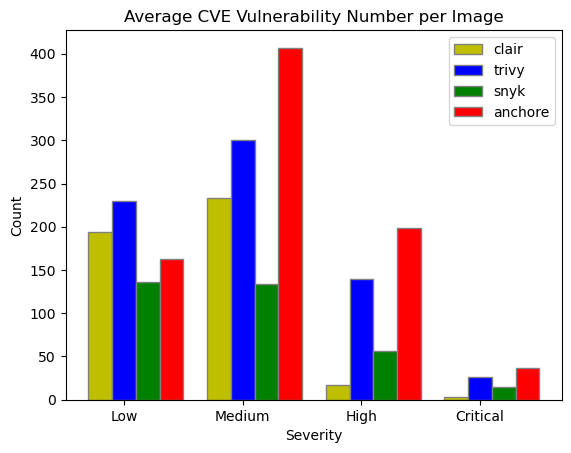

In [21]:
categories = ["Low", "Medium", "High", "Critical"]
clair_data = [clair_count[key] / clair_count['Image_num'] for key in categories]
trivy_data = [trivy_count[key] / trivy_count['Image_num'] for key in categories]
snyk_data = [snyk_count[key] / snyk_count['Image_num'] for key in categories]
anchore_data = [anchore_count[key] / anchore_count['Image_num'] for key in categories]

bar_width = 0.2

r1 = range(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, clair_data, color='y', width=bar_width, edgecolor='grey', label='clair')
plt.bar(r2, trivy_data, color='b', width=bar_width, edgecolor='grey', label='trivy')
plt.bar(r3, snyk_data, color='g', width=bar_width, edgecolor='grey', label='snyk')
plt.bar(r4, anchore_data, color='r', width=bar_width, edgecolor='grey', label='anchore')

plt.xlabel('Severity')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.ylabel('Count')
plt.title('Average CVE Vulnerability Number per Image')
plt.legend()

plt.show()

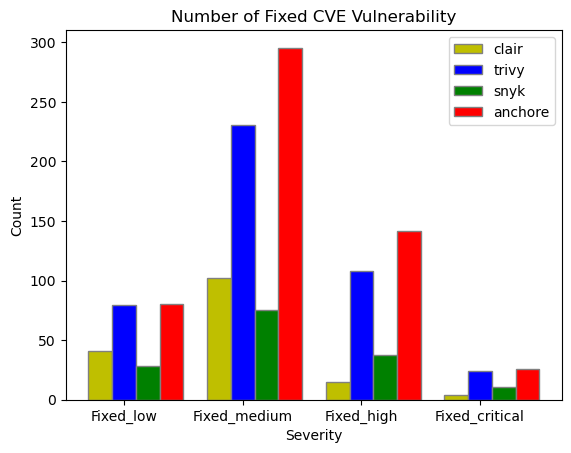

In [22]:
fixed_categories = ["Fixed_low", "Fixed_medium", "Fixed_high", "Fixed_critical"]
fixed_clair_data = [clair_count[key] / clair_count['Image_num'] for key in fixed_categories]
fixed_trivy_data = [trivy_count[key] / trivy_count['Image_num'] for key in fixed_categories]
fixed_snyk_data = [snyk_count[key] / snyk_count['Image_num'] for key in fixed_categories]
fixed_anchore_data = [anchore_count[key] / anchore_count['Image_num'] for key in fixed_categories]

bar_width = 0.2

r1 = range(len(fixed_categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, fixed_clair_data, color='y', width=bar_width, edgecolor='grey', label='clair')
plt.bar(r2, fixed_trivy_data, color='b', width=bar_width, edgecolor='grey', label='trivy')
plt.bar(r3, fixed_snyk_data, color='g', width=bar_width, edgecolor='grey', label='snyk')
plt.bar(r4, fixed_anchore_data, color='r', width=bar_width, edgecolor='grey', label='anchore')

plt.xlabel('Severity')
plt.xticks([r + bar_width for r in range(len(fixed_categories))], fixed_categories)
plt.ylabel('Count')
plt.title('Number of Fixed CVE Vulnerability')
plt.legend()

plt.show()

In [11]:
print(f'Low\t\tMedium\t\tHigh\t\tCritical\t\t')
for data in [clair_count, trivy_count, snyk_count, anchore_count]:
    print(f"{round(data['Fixed_low'] / data['Low'] * 100, 2)}%", end='\t\t')
    print(f"{round(data['Fixed_medium'] / data['Medium'] * 100, 2)}%", end='\t\t')
    print(f"{round(data['Fixed_high'] / data['High'] * 100, 2)}%", end='\t\t')
    print(f"{round(data['Fixed_critical'] / data['Critical'] * 100, 2)}%")

Low		Medium		High		Critical		
21.27%		43.83%		85.58%		98.98%
34.7%		76.74%		77.38%		89.8%
20.61%		56.52%		65.77%		70.31%
49.54%		72.64%		71.05%		68.62%


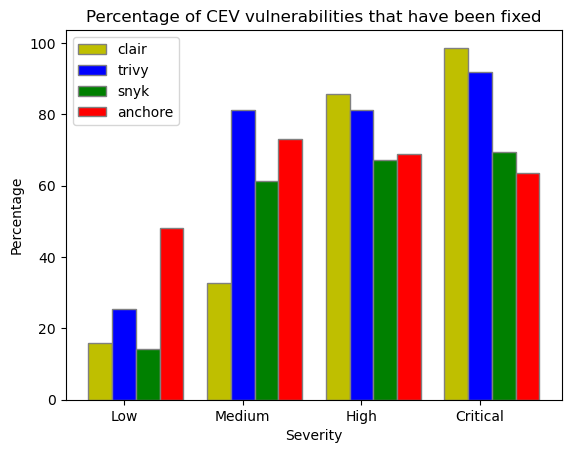

In [23]:
categories = ["Low", "Medium", "High", "Critical"]
clair_data = [15.85, 32.7, 85.57, 98.68]
trivy_data = [25.44, 81.26, 81.13, 91.9]
snyk_data = [14.31, 61.33, 67.34, 69.46]
anchore_data = [48.21, 73.23, 68.83, 63.62]

bar_width = 0.2

r1 = range(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, clair_data, color='y', width=bar_width, edgecolor='grey', label='clair')
plt.bar(r2, trivy_data, color='b', width=bar_width, edgecolor='grey', label='trivy')
plt.bar(r3, snyk_data, color='g', width=bar_width, edgecolor='grey', label='snyk')
plt.bar(r4, anchore_data, color='r', width=bar_width, edgecolor='grey', label='anchore')

plt.xlabel('Severity')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.ylabel('Percentage')
plt.title('Percentage of CEV vulnerabilities that have been fixed')
plt.legend()

plt.show()

In [13]:
# bar_width = 0.2

# r = [0, 3, 6, 9]
# r1 = [x + bar_width for x in r]
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]
# r4 = [x + bar_width for x in r3]
# r5 = [x + bar_width for x in r4]
# r6 = [x + bar_width for x in r5]
# r7 = [x + bar_width for x in r6]
# r8 = [x + bar_width for x in r7]

# plt.bar(r1, clair_data, color='y', width=bar_width, edgecolor='grey', label='clair')
# plt.bar(r2, fixed_clair_data, color='y', width=bar_width, edgecolor='grey', label='fixed_clair')
# plt.bar(r3, trivy_data, color='b', width=bar_width, edgecolor='grey', label='trivy')
# plt.bar(r4, fixed_trivy_data, color='b', width=bar_width, edgecolor='grey', label='fixed_trivy')
# plt.bar(r5, snyk_data, color='g', width=bar_width, edgecolor='grey', label='snyk')
# plt.bar(r6, fixed_snyk_data, color='g', width=bar_width, edgecolor='grey', label='fixed_snyk')
# plt.bar(r7, anchore_data, color='r', width=bar_width, edgecolor='grey', label='anchore')
# plt.bar(r8, fixed_anchore_data, color='r', width=bar_width, edgecolor='grey', label='fixed_anchore')

# plt.xlabel('Severity')
# plt.xticks([r + bar_width for r in [0, 3, 6, 9]], categories)
# plt.ylabel('Count')
# plt.title('Vulnerability Severity Comparison')
# plt.legend()

# plt.show()

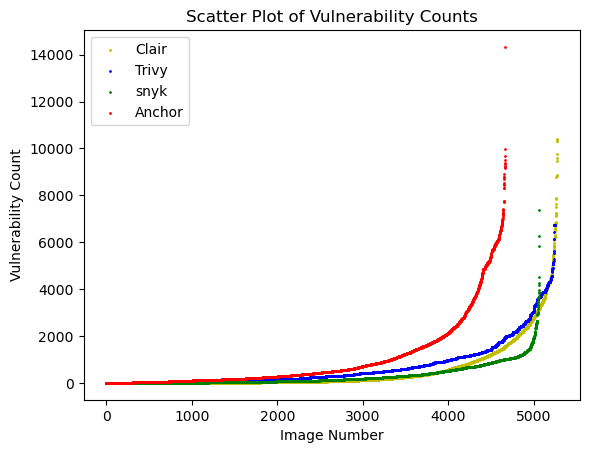

In [14]:
vulnerability_counts1 = []
vulnerability_counts2 = []
vulnerability_counts3 = []
vulnerability_counts4 = []
for image in clair:
    try:
        vulnerability_counts1.append(len(image['Metadata']))
    except:
        pass
for image in trivy:
    try:
        vulnerability_counts2.append(len(image['Metadata']))
    except:
        pass
for image in snyk:
    try:
        vulnerability_counts3.append(len(image['Metadata']))
    except:
        pass
for image in anchore:
    try:
        vulnerability_counts4.append(len(image['Metadata']))
    except:
        pass
vulnerability_counts1 = sorted(vulnerability_counts1)
vulnerability_counts2 = sorted(vulnerability_counts2)
vulnerability_counts3 = sorted(vulnerability_counts3)
vulnerability_counts4 = sorted(vulnerability_counts4)

# 绘制散点图
plt.scatter(range(len(vulnerability_counts1)), vulnerability_counts1, color='y', label='Clair', s=1)
plt.scatter(range(len(vulnerability_counts2)), vulnerability_counts2, color='blue', label='Trivy', s=1)
plt.scatter(range(len(vulnerability_counts3)), vulnerability_counts3, color='green', label='snyk', s=1)
plt.scatter(range(len(vulnerability_counts4)), vulnerability_counts4, color='r', label='Anchor', s=1)

# 设置图表标题和轴标签
plt.title('Scatter Plot of Vulnerability Counts')
plt.xlabel('Image Number')
plt.ylabel('Vulnerability Count')

# 显示图例
plt.legend()

# 显示图表
plt.show()

In [15]:
vuln_dist = {}
for data in [clair_other, trivy_other, snyk_other, anchore_other]:
    for vuln in data:
        vuln_dist[vuln] = [0, 0, 0, 0]
for vuln in clair_other:
    vuln_dist[vuln][0] += 1
for vuln in trivy_other:
    vuln_dist[vuln][1] += 1
for vuln in snyk_other:
    vuln_dist[vuln][2] += 1
for vuln in anchore_other:
    vuln_dist[vuln][3] += 1
vuln_dist

{'ALPINE': [282, 0, 0, 0],
 'GHSA': [102711, 9575, 0, 132713],
 'PYSEC': [26573, 0, 0, 0],
 'GO': [4110, 0, 0, 0],
 'TEMP': [5455, 8719, 0, 0],
 'PHSA': [18424, 0, 0, 0],
 'RHSA': [1533, 0, 0, 0],
 '\nELSA': [1608, 0, 0, 0],
 'ALAS2': [3871, 0, 0, 0],
 'out': [1, 0, 0, 0],
 'RHEA': [24, 0, 0, 0],
 'use': [1, 0, 0, 0],
 'Race condition in multi': [3, 0, 0, 0],
 'RUSTSEC': [16, 0, 0, 0],
 'RHBA': [2, 0, 0, 0],
 'heap': [1, 0, 0, 0],
 'GNUTLS': [3, 0, 0, 0],
 'libiberty/rust': [2, 0, 0, 0],
 'CLI fault on missing ': [1, 0, 0, 0],
 'ALAS': [752, 0, 0, 1406],
 'Buffer Under': [1, 0, 0, 0],
 'GHSL': [1, 0, 0, 0],
 'DLA': [0, 14327, 0, 0],
 'DSA': [0, 2806, 0, 0],
 'NSWG': [0, 2030, 0, 0],
 'SUSE': [0, 428, 0, 0],
 'openSUSE': [0, 202, 0, 0],
 'ELSA': [0, 0, 0, 753],
 'ALASSELINUX': [0, 0, 0, 9],
 'ALASPHP8.2': [0, 0, 0, 9],
 'ALASPHP8.1': [0, 0, 0, 12],
 'ALASPHP8.0': [0, 0, 0, 27]}

In [16]:
clair_vuln_year = {1999: 0, 2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 
                   2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 
                   2019: 0, 2020: 0, 2021: 0, 2022: 0, 2023: 0}
for vuln in clair_set:
    try:
        clair_vuln_year[int(vuln[4:8])] += 1
    except:
        clair_vuln_year[int(vuln[4:8])] = 1

In [17]:
trivy_vuln_year = {1999: 0, 2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 
                   2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 
                   2019: 0, 2020: 0, 2021: 0, 2022: 0, 2023: 0}
for vuln in trivy_set:
    try:
        trivy_vuln_year[int(vuln[4:8])] += 1
    except:
        trivy_vuln_year[int(vuln[4:8])] = 1

In [18]:
snyk_vuln_year = {1999: 0, 2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 
                   2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 
                   2019: 0, 2020: 0, 2021: 0, 2022: 0, 2023: 0}
for vuln in snyk_set:
    try:
        snyk_vuln_year[int(vuln[4:8])] += 1
    except:
        snyk_vuln_year[int(vuln[4:8])] = 1

In [19]:
anchore_vuln_year = {1999: 0, 2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 
                   2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 
                   2019: 0, 2020: 0, 2021: 0, 2022: 0, 2023: 0}
for vuln in anchore_set:
    try:
        anchore_vuln_year[int(vuln[4:8])] += 1
    except:
        anchore_vuln_year[int(vuln[4:8])] = 1

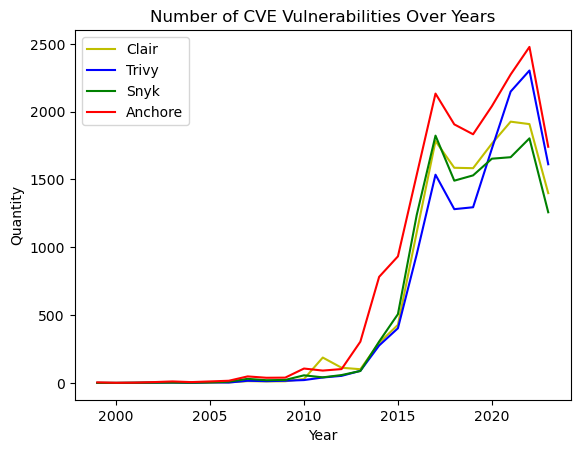

In [20]:
name = ['Clair', 'Trivy', 'Anchore', 'Snyk']
years = list(clair_vuln_year.keys())
clair_year = list(clair_vuln_year.values())
trivy_year = list(trivy_vuln_year.values())
snyk_year = list(snyk_vuln_year.values())
anchore_year = list(anchore_vuln_year.values())

# 绘制四条折线图
plt.plot(years, clair_year, label='Clair', color='y')
plt.plot(years, trivy_year, label='Trivy', color='b')
plt.plot(years, snyk_year, label='Snyk', color='g')
plt.plot(years, anchore_year, label='Anchore', color='r')

# 设置图表标题和轴标签
plt.title('Number of CVE Vulnerabilities Over Years')
plt.xlabel('Year')
plt.ylabel('Quantity')

# 显示图例
plt.legend()

# 显示图表
plt.show()